In [300]:
# Import data organization libraries
import pandas as pd
pd.set_option('display.max_colwidth', 200)

In [301]:
# Read data into Pandas Dataframe
data = pd.read_csv('tweet_data.csv')
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


##### 0 refers to positive sentiment, 1 refers to negative sentiment

In [302]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [303]:
# Check for missing values
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [304]:
# Drop the id column
data.drop('id', axis=1, inplace=True)
data.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


<Axes: xlabel='label'>

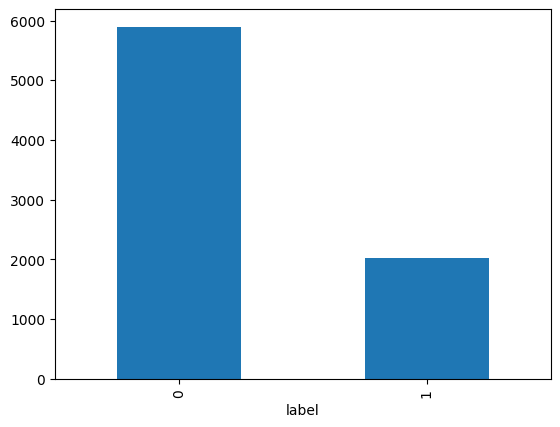

In [305]:
# Check for the class balance and plot it
data['label'].value_counts(normalize=True)

data['label'].value_counts().plot(kind='bar')

In [306]:
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [307]:
import re

In [308]:
# Substitute 's with " is"
re.sub(r"'s\b", " is", data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [309]:
# Removing the user mentions
data['tweet'][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [310]:
# We'll retain the letters and digits
re.sub('@[A-Za-z0-9]+', '', data['tweet'][11])

'Ha! Not heavy machinery but it does what I need it to.  really dropped the ball with that design. #drinkyourhaterade'

In [311]:
# Remove the hashtags
data['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [312]:
re.sub('#', '', data['tweet'][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [313]:
# Removing the hyperlinks
re.sub(r"http\S+", '', data['tweet'][0])

'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [314]:
# Retain the letters (get rid of punctuations, special characters, and digits)
data['tweet'][25]

'1.05 billion for 3 patents where there is prior art = 300 millions each = patent trolls are partying now thanks to Apple #apple'

In [315]:
re.sub(r'[^a-zA-Z]', ' ', data['tweet'][25])

'     billion for   patents where there is prior art       millions each   patent trolls are partying now thanks to Apple  apple'

### Stop words removal

Stop words are the words that are commonly used in any language. These words do not add any meaning to the text. For example, in the sentence, "The sky is blue in color", 
the words "the" and "is" do not add any meaning to the sentence. These words can be removed from the text to reduce the dimensionality of the data and hence, the processing time.

Natural Language Toolkit (NLTK) is a Python library that provides modules for processing text, tokenizing, parsing, etc.

In [316]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [317]:
nltk_stopwords = set(stopwords.words('english'))
nltk_stopwords
#len(nltk_stopwords)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [318]:
# Alternative source of stopwords from Scikit-learn
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
sklearn_stopwords
#len(sklearn_stopwords)

{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'both',
 'bottom',
 'but',
 'by',
 'call',
 'can',
 'cannot',
 'cant',
 'co',
 'con',
 'could',
 'couldnt',
 'cry',
 'de',
 'describe',
 'detail',
 'do',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eg',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'etc',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'fill',
 'find',
 'fire',
 'first',
 'five',
 'for'

In [319]:
# Find the overlap of stopwords between NLTK and Scikit-learn
print(nltk_stopwords.intersection(sklearn_stopwords))
len(nltk_stopwords.intersection(sklearn_stopwords))

{'which', 'again', 'only', 'myself', 'do', 'he', 'has', 'until', 'than', 'ours', 'is', 'not', 'with', 'the', 'no', 'all', 'an', 'there', 'yourselves', 'or', 'you', 'for', 'her', 'so', 'between', 'whom', 'what', 'a', 'and', 'own', 'have', 'now', 'me', 'such', 'out', 'down', 'other', 'to', 'who', 'very', 'i', 'some', 'ourselves', 'those', 'same', 'himself', 'that', 'nor', 'above', 'up', 'my', 'are', 'be', 'in', 'why', 'once', 'will', 'these', 'but', 'if', 'it', 'over', 'through', 'should', 'were', 'further', 'their', 'themselves', 'been', 'its', 'by', 'where', 'she', 'when', 'him', 'we', 'can', 'yourself', 'at', 'while', 'his', 'into', 'few', 'here', 'any', 'then', 'below', 'off', 'being', 'as', 'of', 're', 'after', 'your', 'am', 'hers', 'had', 'about', 'during', 'this', 'both', 'most', 'more', 'was', 'too', 'they', 'under', 'because', 'yours', 'our', 'each', 'on', 'before', 'itself', 'against', 'from', 'how', 'herself', 'them'}


119

In [320]:
# Combining the stopwords from NLTK and Scikit-learn
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)
len(combined_stopwords)

378

### Stemming and Lemmatization

Stemming is the process of reducing a word to its stem or root form. For example, the words "fishing", "fished", "fisher" all stem from the word "fish". Stemming is a crude method of normalization. It does not always result in a valid word. However, it is fast and useful in some cases.

Lemmatization is the process of reducing a word to its lemma or dictionary form. For example, the words "good", "better", "best" all stem from the word "good". Lemmatization is a more sophisticated method of normalization. It always results in a valid word. However, it is slower than stemming.

In [321]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

In [322]:
data['tweet'][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [323]:
# Lemmatize the words in the sentence
new_sent = ''
for token in data['tweet'][63].split():
    new_sent += lemmatizer.lemmatize(token.lower()) + ' '

new_sent

'gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

In [324]:
import contractions
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [325]:
# Removes the contractions
contractions.fix(data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

## Define the Cleaner Function

In [326]:
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    cleaned_text = ''
    for token in new_text.split():
        cleaned_text += lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [327]:
cleaned_tweets = []
for twt in data['tweet']:
    cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))

cleaned_tweets[:5]

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ',
 'finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias ',
 'we love this would you go talk makememories unplug relax iphone smartphone wifi connect ',
 'i am wired i know i am george i wa made that way iphone cute daventry home ',
 'what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support ']

In [328]:
cleaned_tweets[24]

'it is time for new wallpaper phone wallpaper wall screen galaxy samsung app '

In [329]:
data['tweet'][1500]

'#Apple Bunch if Crooks Refused to repair/replace my beats wireless. Problem rubber on mic coming off microphones stopped working. Said warranty was void because ear piece looked chewed. Bullshit. I don’t have any animals and I would chew on anything I put in my ear. pic.twitter.com/GfgvquEpuC'

In [330]:
cleaned_tweets[1500]

'apple bunch if crook refused to repair replace my beat wireless problem rubber on mic coming off microphone stopped working said warranty wa void because ear piece looked chewed bullshit i do not have any animal and i would chew on anything i put in my ear pic twitter com gfgvquepuc '

In [331]:
# tweet['tweet'].apply(lambda x: tweet_cleaner(x))

In [332]:
data['cleaned_tweets_w/o_SW'] = cleaned_tweets
data.head()

,label,tweet,cleaned_tweets_w/o_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support


### Data Visualization

In [333]:
# Plot the 25 most common words in this tweets dataset
all_words = []
for t in data['tweet']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # number of unique words in the list

['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia', '#iphone', 'Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':)', '#yay', '#Sony', '#Xperia', '#S', '#sonyexperias…', 'http://instagram.com/p/YGEt5JC6JM/', 'We', 'love', 'this!', 'Would', 'you', 'go?', '#talk', '#makememories', '#unplug', '#relax', '#iphone', '#smartphone', '#wifi', '#connect...', 'http://fb.me/6N3LsUpCu', "I'm", 'wired', 'I', 'know', "I'm"]


34348

In [334]:
import matplotlib.pyplot as plt

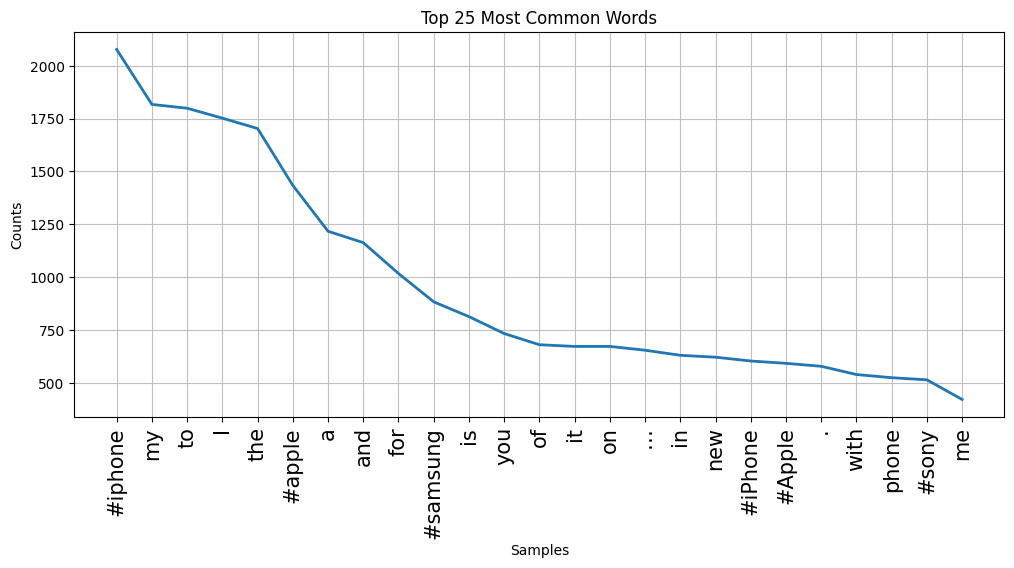

In [335]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12, 5))
plt.title('Top 25 Most Common Words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

This data visualization is essentially useless outside of some information gained about how people are talking about iPhone, Apple, Samsung, and Sony. No contextual information can be gained about those topics. This is because the original tweet data was used and not the cleaned data.

In [336]:
# Data Visualization for Cleaned Data
all_words = []
for t in data['cleaned_tweets_w/o_SW']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # number of unique words in the list

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'a', 'transparant', 'silicon', 'case', 'thanks', 'to', 'my', 'uncle', 'yay', 'sony', 'xperia', 's', 'sonyexperias', 'we', 'love', 'this', 'would', 'you', 'go', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'i', 'am', 'wired', 'i', 'know', 'i', 'am', 'george', 'i', 'wa']


16807

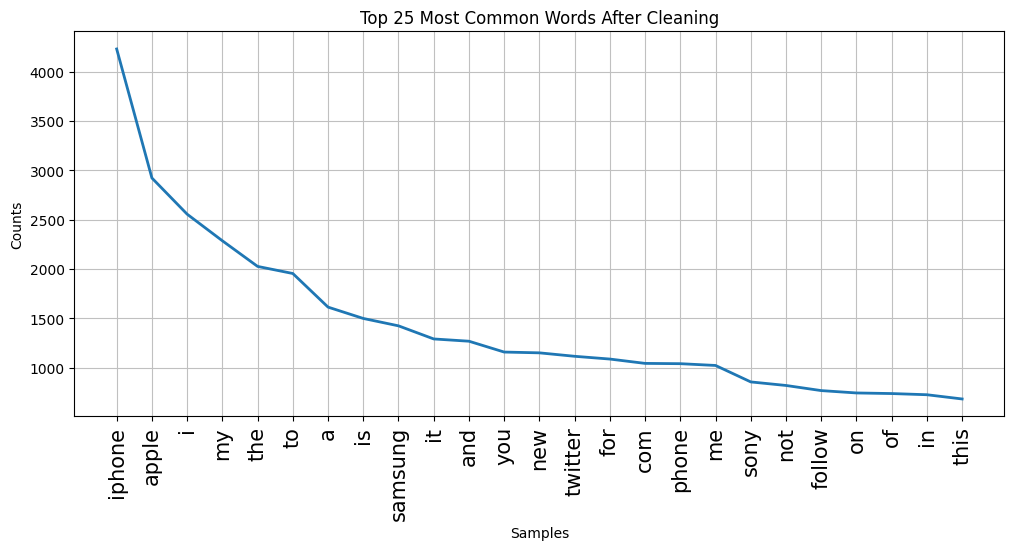

In [337]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12, 5))
plt.title('Top 25 Most Common Words After Cleaning')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

This data visualization is going in the right direction, however, there are still many words that have no meaning (stop words). These words should be removed from the data. Additionally, these removed stop words will reduce the dimensionality of the data and hence, the processing time and complexity.

In [338]:
# Apply stopwords removal
def tweet_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    new_text = [token for token in new_text.split() if token not in combined_stopwords]

    cleaned_text = ''
    for token in new_text:
        cleaned_text += lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [339]:
cleaned_tweets = list(data['tweet'].apply(tweet_cleaner_with_stopwords))
print(cleaned_tweets[:10])

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ', 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias ', 'love talk makememories unplug relax iphone smartphone wifi connect ', 'wired know george way iphone cute daventry home ', 'amazing service apple talk question unless pay stupid support ', 'iphone software update fucked phone big time stupid iphones ', 'happy instapic instadaily sony xperia xperiaz ', 'new type c charger cable uk bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc ', 'bout shopping listening music iphone justme music likeforlike followforfollow ', 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor ']


In [340]:
data['cleaned_tweets_with_SW'] = cleaned_tweets
data.head()

,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


In [341]:
# Data Visualization for Cleaned Data
all_words = []
for t in data['cleaned_tweets_with_SW']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # number of unique words in the list

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'way', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service', 'apple', 'talk', 'question', 'unless', 'pay', 'stupid', 'support', 'iphone', 'software']


16564

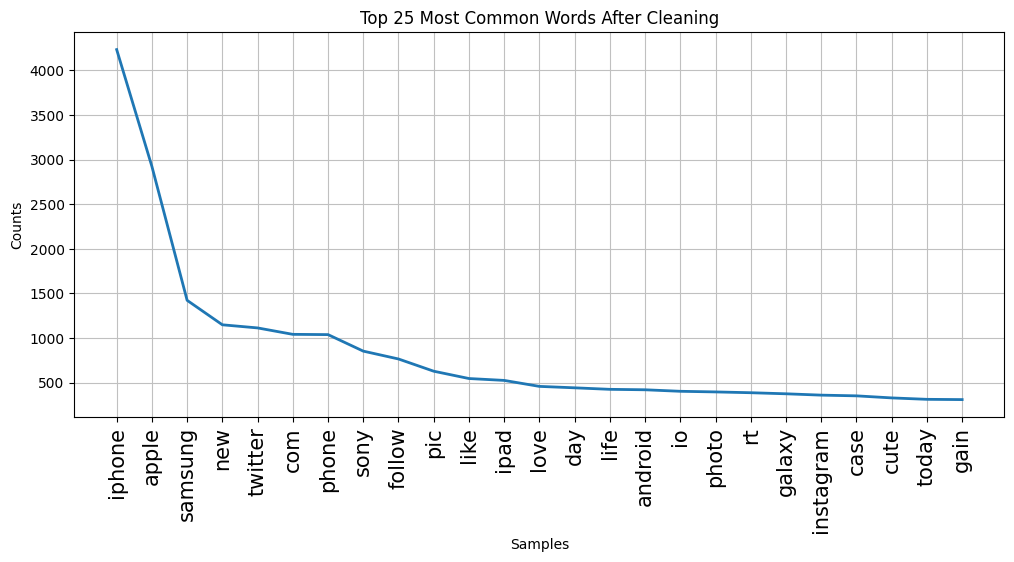

In [342]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12, 5))
plt.title('Top 25 Most Common Words After Cleaning')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

Again, this is heading in the right direction. However, there are still some very popular words that, for this use case, do not add any meaning to the data. These words should be removed from the data. Additionally, these removed stop words will reduce the dimensionality of the data and hence, the processing time and complexity.

In [343]:
domain_stopwords = ['phone', 'mobile', 'twitter', 'rt', 'com', 'follow', 'io', 'got', 'p']
final_stopwords = domain_stopwords + list(combined_stopwords)

In [344]:
# Re-implement the cleaner function with final_stopwords
# Apply stopwords removal
def tweet_cleaner_with_final_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    new_text = [token for token in new_text.split() if token not in final_stopwords]

    new_text = [token for token in new_text if len(token) > 2]

    cleaned_text = ''
    for token in new_text:
        cleaned_text += lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [345]:
cleaned_tweets = list(data['tweet'].apply(tweet_cleaner_with_final_stopwords))
print(cleaned_tweets[:10])

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ', 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias ', 'love talk makememories unplug relax iphone smartphone wifi connect ', 'wired know george way iphone cute daventry home ', 'amazing service apple talk question unless pay stupid support ', 'iphone software update fucked big time stupid iphones ', 'happy instapic instadaily sony xperia xperiaz ', 'new type charger cable bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic pjiwq wtc ', 'bout shopping listening music iphone justme music likeforlike followforfollow ', 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor ']


In [346]:
data['cleaned_tweets_with_final_SW'] = cleaned_tweets
data.drop('cleaned_tweets_with_SW', axis=1, inplace=True)
data.head()

,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_final_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


In [347]:
# Data Visualization for Cleaned Data
all_words = []
for t in data['cleaned_tweets_with_final_SW']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # number of unique words in the list

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'way', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service', 'apple', 'talk', 'question', 'unless', 'pay', 'stupid', 'support', 'iphone', 'software']


16170

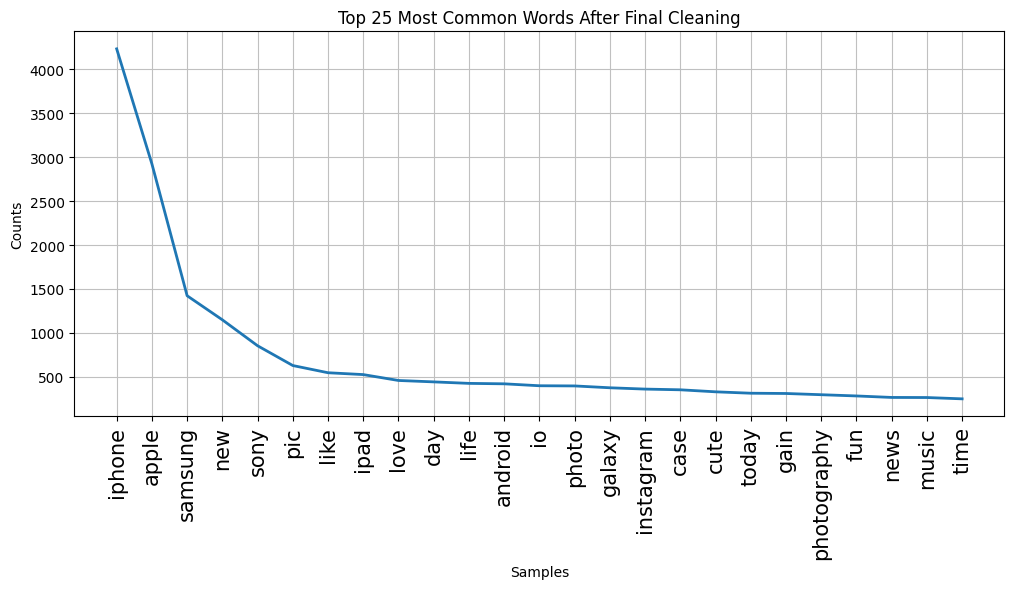

In [348]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12, 5))
plt.title('Top 25 Most Common Words After Final Cleaning')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

This looks good enough now for the analysis we would like to perform.

### Bag of Words Model (Feature Extraction)

- Count Vectorizer
- TF-IDF Vectorizer

The Bag of Words Model is a simple model that counts the frequency of the words in a document without considering the order in which they appear. The Bag of Words Model is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

In [349]:
data.shape

(7920, 4)

In [350]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV_features = CV.fit_transform(data['cleaned_tweets_with_final_SW'])

In [351]:
CV_features.shape

(7920, 16167)

In [352]:
CV_features[0]

<1x16167 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

"sparse matrix": a matrix in which most of the elements are zero. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements.

In [353]:
df = data.copy()
df.columns = ['label', 'cleaned_tweets_incl_SW', 'cleaned_tweets_SW_removed', 'cleaned_tweets_SW_removed_len_gt2']
df.to_pickle('cleaned_tweets.pkl')
df.to_csv('cleaned_tweets.csv', index=False)

In [354]:
type(CV_features[0]) # each row is a compressed sparse row

scipy.sparse._csr.csr_matrix

In [355]:
CV_features[0].todense() # decompressing the CSR data

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [356]:
df = pd.DataFrame(CV_features.todense())
df

,0,1,2,3,4,5,6,7,8,9,...,16157,16158,16159,16160,16161,16162,16163,16164,16165,16166
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [357]:
df.size/1e6 # this many elements are present in the dataframe

128.04264

In [358]:
import numpy as np
np.count_nonzero(df)

77735

In [359]:
100*np.count_nonzero(df)/(df.size) # percent of the non-zero elements in the dataframe

0.060710244649751055

In [360]:
CV.get_feature_names_out()[:50]

array(['aaaahhhhhhh', 'aag', 'aah', 'aalborg', 'aand', 'aapl', 'aarhus',
       'aaron', 'aaronbrandt', 'aarp', 'aarrrggghhhh', 'aashamsakal',
       'aaydojbfkq', 'aayp', 'ab', 'abah', 'abajournal', 'abareta',
       'abay', 'abb', 'abc', 'abdou', 'abdullahoashraf', 'abe',
       'abeecwaldon', 'aber', 'abercrombie', 'abfad', 'abfadofficial',
       'abi', 'ability', 'abit', 'able', 'ableton', 'abnqum', 'aboard',
       'aboutalook', 'aboutdamntime', 'abouttime', 'abouttonight', 'abp',
       'abscbn', 'absence', 'absolute', 'absolutely', 'absurd', 'abu',
       'abudhabi', 'abuja', 'abujacity'], dtype=object)

In [361]:
len(CV.get_feature_names_out())

16167

In [362]:
CV_features[10].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [365]:
# Reverses the 1s and 0s to the actual words
CV.inverse_transform(np.asarray(CV_features[10].todense())) # actual words in the 11th tweet

[array(['apple', 'color', 'crash', 'fuckin', 'hey', 'inch', 'ipod', 'make',
        'minite', 'new', 'thinner'], dtype='<U41')]

### Model Building

In [366]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CV_features, data['label'], test_size=0.25, stratify=data['label'], random_state=42)

The stratify parameter used in the train_test_split function ensures that the training and test sets have approximately the same percentage of samples of each target class as the complete set. This is important because the data is imbalanced. If the data is not stratified, the model will be trained on a dataset that does not accurately represent the data. This will result in a model that is not accurate.

In [373]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print(LR.score(X_train, y_train)) # train score
print(LR.score(X_test, y_test)) # test score

0.9750841750841751
0.8818181818181818


These values show that the model is overfitted. The gap between training and test accuracies is far above the standard 1-2% allowed gap. This means that the model is not generalizing well to new data. This is because the model is too complex for the data. The model is overfitting to the training data. This is a common problem with text data.

I believe that the root cause of this overfitting is the extremely high dimensionality of the data. The data has 10,000 features. This is far too many features for the amount of data that we have. This is known as the curse of dimensionality. The model is too complex for the data. This is causing the model to overfit to the training data.

In [374]:
# We can regularize the model to improve scores
from sklearn.linear_model import LogisticRegression

# L1-Regularization
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train)) # train score
print(LR1.score(X_test, y_test)) # test score

0.8853535353535353
0.8626262626262626


This is definitely better than the previous model. The gap between training and test accuracies is now within the standard 1-2% allowed gap. This means that the model is generalizing well to new data.

In [369]:
# Cross-Validate the Logistic Regression model
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

In [375]:
X = CV_features
y = data['label']

In [376]:
# Cross-Validate the LR2 Model
LR2 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l2', C=0.06)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR2, X, y, cv=kfold, scoring='accuracy')

print(results)
print(np.round((results.mean()) * 100, 2), np.round((results.std()) * 100, 2))

[0.87941919 0.85606061 0.85290404 0.86426768 0.86868687]
86.43 0.94


In [377]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(LR2, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

In [378]:
results

{'fit_time': array([0.22178411, 0.03517079, 0.04706192, 0.02764082, 0.04631305]),
 'score_time': array([0.00121403, 0.00117612, 0.00116515, 0.00111318, 0.001194  ]),
 'test_score': array([0.87941919, 0.85606061, 0.85290404, 0.86426768, 0.86868687]),
 'train_score': array([0.88857323, 0.88794192, 0.88999369, 0.88983586, 0.8884154 ])}

In [379]:
print(results['train_score'])
print(np.round((results['train_score'].mean()) * 100, 2), np.round((results['train_score'].std()) * 100, 2))

[0.88857323 0.88794192 0.88999369 0.88983586 0.8884154 ]
88.9 0.08


In [380]:
print(results['test_score'])
print(np.round((results['test_score'].mean()) * 100, 2), np.round((results['test_score'].std()) * 100, 2))

[0.87941919 0.85606061 0.85290404 0.86426768 0.86868687]
86.43 0.94


In [381]:
# Hyperparameter Tuning of the LR2 Model
from sklearn.model_selection import GridSearchCV

LR2 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l2')

C_values = np.arange(0.00001, 1, 0.05) # 20 values

grid = GridSearchCV(estimator=LR2, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END .............................C=0.050010000000000006; total time=   0.0s
[CV] END .............................C=0.050010000000000006; total time=   0.0s
[CV] END .............................C=0.050010000000000006; total time=   0.0s
[CV] END .............................C=0.050010000000000006; total time=   0.0s
[CV] END .............................C=0.050010000000000006; total time=   0.0s
[CV] END ..........................................C=0.10001; total time=   0.0s
[CV] END ......................................

In [383]:
grid_results.best_params_, grid_results.best_score_, grid_results.best_index_

({'C': 0.40001000000000003}, 0.8837121212121213, 8)

In [384]:
grid_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [385]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_] * 100

88.37121212121212

In [386]:
grid_results.cv_results_['mean_train_score'][grid_results.best_index_] * 100

94.17297979797979

The above represents the "best-fitted" model from GridSearchCV and could still be overfitted.

In [387]:
grid_results.cv_results_['std_test_score'][grid_results.best_index_] * 100

1.0453142442332912

In [388]:
grid_results.cv_results_['mean_test_score']

array([0.77146465, 0.86098485, 0.87260101, 0.87664141, 0.87967172,
       0.88106061, 0.88207071, 0.88320707, 0.88371212, 0.88308081,
       0.88333333, 0.88295455, 0.88320707, 0.88295455, 0.88270202,
       0.88232323, 0.88232323, 0.88232323, 0.88257576, 0.88207071])

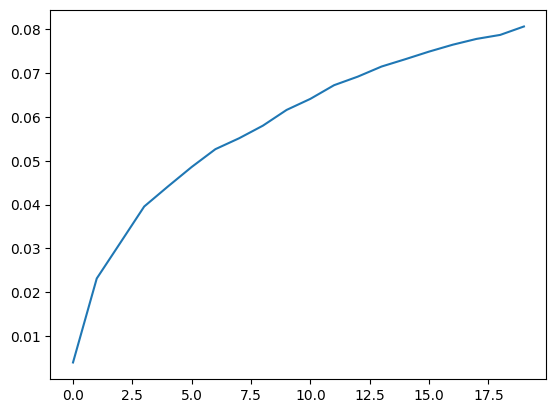

In [389]:
plt.plot(grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score'])

In [390]:
grid_results.param_grid

{'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
        2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
        5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
        7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])}

In [391]:
grid_results.param_grid['C'][3]

0.15001000000000003

In [392]:
grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score']

array([0.00391414, 0.02310606, 0.03131313, 0.03955177, 0.04412879,
       0.04857955, 0.05265152, 0.0551452 , 0.05801768, 0.06161616,
       0.06414141, 0.06726641, 0.06922348, 0.07152778, 0.07320076,
       0.07493687, 0.07651515, 0.07784091, 0.07875631, 0.08068182])

In [402]:
# Create pipeline and Cross-Validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_with_final_SW']
y = data['label']

CV = CountVectorizer()
LR2 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l2', C=0.15)

CV_pipe = Pipeline([('CV', CV), ('LR2', LR2)])

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean()) * 100, 2), np.round((results.std()) * 100, 2))

87.63 0.95


In [395]:
CV_pipe.named_steps

{'CV': CountVectorizer(),
 'LR2': LogisticRegression(C=0.15, class_weight='balanced', solver='liblinear')}

In [396]:
CV_pipe.fit(X, y)

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR2',
                 LogisticRegression(C=0.15, class_weight='balanced',
                                    solver='liblinear'))])

In [397]:
len(CV_pipe['CV'].vocabulary_) # CV with stopwords applied and word_len > 2

16167

In [398]:
CV_pipe['CV'].vocabulary_

{'fingerprint': 4619,
 'pregnancy': 11078,
 'test': 14035,
 'android': 460,
 'apps': 694,
 'beautiful': 1241,
 'cute': 3095,
 'health': 6001,
 'igers': 6515,
 'iphoneonly': 7096,
 'iphonesia': 7109,
 'iphone': 7060,
 'finally': 4603,
 'transparant': 14469,
 'silicon': 12762,
 'case': 2195,
 'thanks': 14077,
 'uncle': 14792,
 'yay': 15915,
 'sony': 13091,
 'xperia': 15833,
 'sonyexperias': 13102,
 'love': 8379,
 'talk': 13835,
 'makememories': 8598,
 'unplug': 14855,
 'relax': 11746,
 'smartphone': 12938,
 'wifi': 15540,
 'connect': 2777,
 'wired': 15586,
 'know': 7746,
 'george': 5259,
 'way': 15346,
 'daventry': 3210,
 'home': 6200,
 'amazing': 389,
 'service': 12527,
 'apple': 604,
 'question': 11425,
 'unless': 14844,
 'pay': 10510,
 'stupid': 13531,
 'support': 13665,
 'software': 13042,
 'update': 14880,
 'fucked': 4988,
 'big': 1428,
 'time': 14269,
 'iphones': 7105,
 'happy': 5859,
 'instapic': 6930,
 'instadaily': 6816,
 'xperiaz': 15847,
 'new': 9673,
 'type': 14697,
 'charger

### LR Model Without vs With Stop Words

In [407]:
# Create pipeline and Cross-Validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

# Added stop words, minimum document frequency, and maximum features parameters
CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=None)
LR2 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l2', C=0.15)

CV_pipe = Pipeline([('CV', CV), ('LR2', LR2)])

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean()) * 100, 2), np.round((results.std()) * 100, 2))

86.84 0.89


In [408]:
CV_pipe.fit(X, y)
len(CV_pipe['CV'].vocabulary_)

1092

It can be seen now that even with the removal of about 14,000 words, the model accuracy and variance are hardly affected at all. This is because the words that were removed were not very important to the model. This is a good thing because it means that the model is not overfitting to the training data. Additionally, it can be seen that there is an improvement of the variance by a few percent with a minimal decrease in accuracy of less than 1 percent. This is a good thing because it means that the model is generalizing better to new data. The model is also far more computationally efficient from previously higher dimensional versions.